<a href="https://colab.research.google.com/github/Ehtisham1053/Classification-ML-algorithms/blob/main/Bagging_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [23]:
class BaggingClassifier:
    def __init__(self, n_estimators=10, sample_size=0.8, max_depth=None):
        self.n_estimators = n_estimators
        self.sample_size = sample_size
        self.max_depth = max_depth
        self.models = []
        self.subsets = []

    def fit(self, X, y):
        self.models = []
        self.subsets = []
        n_samples = int(self.sample_size * len(X))

        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), n_samples, replace=True)
            X_subset, y_subset = X[indices], y[indices]
            model = DecisionTreeClassifier(max_depth=self.max_depth)
            model.fit(X_subset, y_subset)
            self.models.append(model)
            self.subsets.append(indices)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return np.round(np.mean(predictions, axis=0))

    def evaluate(self, X_train, y_train, X_test, y_test):
        y_train_pred = self.predict(X_train)
        y_test_pred = self.predict(X_test)

        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        cm = confusion_matrix(y_test, y_test_pred)
        report = classification_report(y_test, y_test_pred)

        print("Training Accuracy:", train_acc)
        print("Testing Accuracy:", test_acc)
        # print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", report)
                # Plot Confusion Matrix
        plt.figure(figsize=(6,5))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues', values_format='d')
        plt.title("Confusion Matrix")
        plt.show()


        pca = PCA(n_components=2)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        X_pca = pca.transform(X)
        xx, yy = np.meshgrid(np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 100),
                     np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 100))
        Z = bagging_clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(5,4))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
        sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='coolwarm', edgecolor='k')
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.title("Decision Boundary of Bagging Classifier")
        plt.show()
        # return train_acc, test_acc, cm, report

In [24]:
# Load Dataset from seaborn
data = sns.load_dataset("penguins").dropna()
X = data.drop(columns=['species']).select_dtypes(include=[np.number]).values
y = data['species'].astype('category').cat.codes.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training Accuracy: 0.9661654135338346
Testing Accuracy: 0.9850746268656716
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



<Figure size 600x500 with 0 Axes>

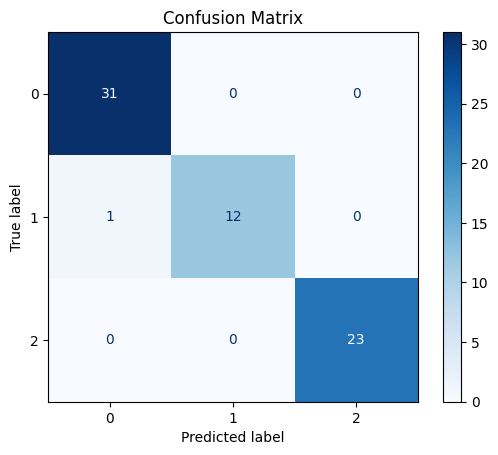

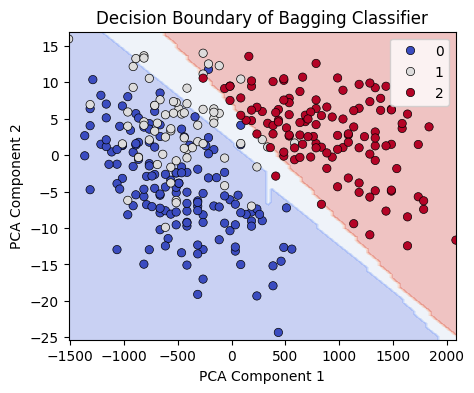

In [25]:
# Train and Evaluate Bagging Classifier
bagging_clf = BaggingClassifier(n_estimators=10, sample_size=0.8, max_depth=3)
bagging_clf.fit(X_train, y_train)
bagging_clf.evaluate(X_train, y_train, X_test, y_test)

# Bagging Classifier - Understanding the Concept

## What is Bagging?
Bagging (Bootstrap Aggregating) is an ensemble learning technique that improves the stability and accuracy of machine learning models by training multiple instances of a base model on different subsets of data and aggregating their predictions.

---

## How Bagging Works?
1. **Data Sampling**:  
   - Bagging uses **bootstrap sampling**, where multiple random subsets of the training data are drawn with replacement.
   - Each subset has the same number of features as the original dataset but contains a **random selection of samples**.

2. **Model Training**:  
   - A **base model** (usually a Decision Tree) is trained independently on each sampled subset.
   - Each model learns patterns specific to its dataset, helping reduce variance.

3. **Prediction Aggregation**:  
   - For classification tasks, bagging **combines predictions** from all models using **majority voting**.
   - For regression, it takes the **average** of all model outputs.

---

## Why Bagging Works?
- **Reduces Overfitting (Variance Reduction)**:  
  - Since each model learns from a different subset of data, the **overall model generalizes better** to unseen data.
  
- **Handles Noisy Data**:  
  - Individual models may capture noise, but combining multiple models smoothens out the predictions.

- **Improves Model Stability**:  
  - A single Decision Tree is highly sensitive to small changes in data. Bagging mitigates this issue by averaging multiple predictions.

---

## When to Use Bagging?
✅ **High Variance Models**:  
   - Bagging works best when using unstable models like **Decision Trees**, which are prone to overfitting.  
   - Example: **Random Forest**, which is an extension of bagging applied to decision trees.

✅ **When Data is Noisy**:  
   - Since bagging helps reduce variance, it can be useful for noisy datasets with inconsistencies.

✅ **Small to Medium-Sized Datasets**:  
   - If the dataset is too large, training multiple models can be computationally expensive.

---

## Limitations of Bagging
❌ **Not Effective for Low Variance Models**:  
   - Bagging does not improve models like Logistic Regression or Naive Bayes, which already have low variance.

❌ **Computationally Expensive**:  
   - Training multiple models increases computational cost and memory usage.

❌ **Less Interpretability**:  
   - Since multiple models contribute to a final decision, understanding individual decision paths becomes harder.

---

## Where is Bagging Used?
- **Random Forest Algorithm**:  
  - Random Forest applies bagging to Decision Trees and adds additional randomness in feature selection.
  
- **Financial Fraud Detection**:  
  - Helps reduce bias in detecting fraudulent transactions.

- **Medical Diagnosis**:  
  - Improves reliability in disease prediction models.

- **Image Recognition**:  
  - Used in ensemble learning techniques to boost accuracy.

---

# Conclusion
Bagging is a powerful ensemble learning method that enhances model accuracy and robustness by combining multiple weak learners. It is widely used in machine learning applications where reducing variance and improving generalization is essential.
